In [ ]:
"""
Second round of text data cleaning.
After tokenization:

- stemming/lemmatization
- parts of speech (POS) tagging
- create bi-grams or tri-grams
- handle typos

"""

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import re
import string

from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer

from collections import Counter

from wordcloud import WordCloud

In [ ]:
# nltk.download()

### 1. Load data

In [2]:
speech_clean = pd.read_pickle('../dump/speech_clean')

### 2. Stemming / Lemmatization

#### A. Stemming

In [3]:
# Create an object of class PorterStemmer
porter = PorterStemmer() # Uses Suffix Stripping (simplicity and speed)
lancaster = LancasterStemmer() # May over-stem

In [4]:
def stemSentence(text):
    token_words=word_tokenize(text)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

In [5]:
speech_clean_2 = speech_clean.copy()
speech_clean_2['transcript'] = speech_clean['transcript'].apply(lambda x: stemSentence(x))

In [6]:
# Pickle
# speech_clean_2.to_pickle('../dump/speech_clean_2')
speech_clean_2

,speaker,year,transcript,length
0,SIDDHARTHA MUKHERJEE,2018,i wish someon had told me at my own commenc th...,14487
1,ABBY WAMBACK,2018,failur is not someth to be asham of it someth ...,15866
2,JON B. FISHER,2018,thank you veri much my father commenc speaker ...,8544
3,MINDY KALING,2018,good morn to the class of the faculti the pare...,15391
4,JESMYN WARD,2018,persist be patient be well good morn it is an ...,14063
...,...,...,...,...
436,CARRIE CHAPMAN,1936,i bring a messag to sweet briar colleg and esp...,22942
437,FRANKLIN D ROOSEVELT,1932,for me as for you thi is a day of honor attain...,16017
438,OPRAH WINFREY,1918,thank you walli annenberg and a special thank ...,15301
439,RALPH WALDO,1838,in thi refulg summer it ha been a luxuri to dr...,40403


In [7]:
# Document-Term Matrix based on speech_clean_2 (after stemming)
# columns: 39268 --> 31502
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(speech_clean_2.transcript)

data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = speech_clean_2.index
data_dtm = data_dtm.iloc[:,:-1]
data_dtm

,aa,aahhhh,aaron,aback,abalthu,abandon,abat,abbi,abbot,abbrevi,...,ôi,ômay,ôsobrieti,ôtell,ôthe,ôwe,ôwhat,ôyou,ôyouõr,über
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
439,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Pickle
# data_dtm.to_pickle("../dump/data_dtm_2.pkl")

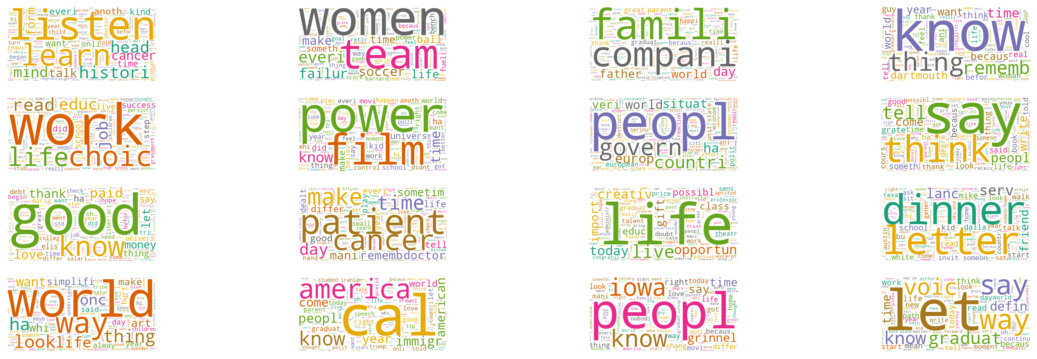

In [8]:
# Quickly check word clouds
from sklearn.feature_extraction import text 

data = data_dtm
# Find the top 30 words said in each speech
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))
    
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)

add_stop_words = ['like','youre','ive','im','really','id','ve','just','dont','thi','wa']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

data = data_dtm.transpose()
# Reset the output dimensions
plt.rcParams['figure.figsize'] = [20, 8]

# full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
#               'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

# Create subplots for each comedian
for index, speech in enumerate(data.iloc[:,:16].columns):
    wc.generate(speech_clean_2.transcript[speech])
    
    plt.subplot(5, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
#     plt.title(full_names[index])
    
plt.show()

In [ ]:
# Stemming is not ideal for future viz. Only convenient for quick analysis.

#### B. Lemmatization

In [9]:
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

In [10]:
def lemmaSentence(text):
    token_words=word_tokenize(text)
    token_words
    lemma_sentence=[]
    for word in token_words:
        lemma_sentence.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        lemma_sentence.append(" ")
    return "".join(lemma_sentence)

In [11]:
speech_clean_3 = speech_clean.copy()
speech_clean_3['transcript'] = speech_clean['transcript'].apply(lambda x: lemmaSentence(x))

In [12]:
# Document-Term Matrix based on speech_clean_2 (after stemming)
# columns: 39268 --> 36167
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(speech_clean_3.transcript)

data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = speech_clean_3.index
data_dtm = data_dtm.iloc[:,:-1]
data_dtm

,aa,aahhhh,aaron,aback,abalthus,abandon,abandonment,abate,abbot,abbreviation,...,ôi,ômay,ôsobriety,ôtell,ôthe,ôwe,ôwhat,ôyou,ôyouõre,über
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
439,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Quickly check word clouds
# Helpful for adding new stop words manually

data = data_dtm
# Find the top 30 words said in each speech
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))
    
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)

add_stop_words = ['like','youre','ive','im','really','id','ve','just','dont','thi','wa','say','know']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

data = data_dtm.transpose()

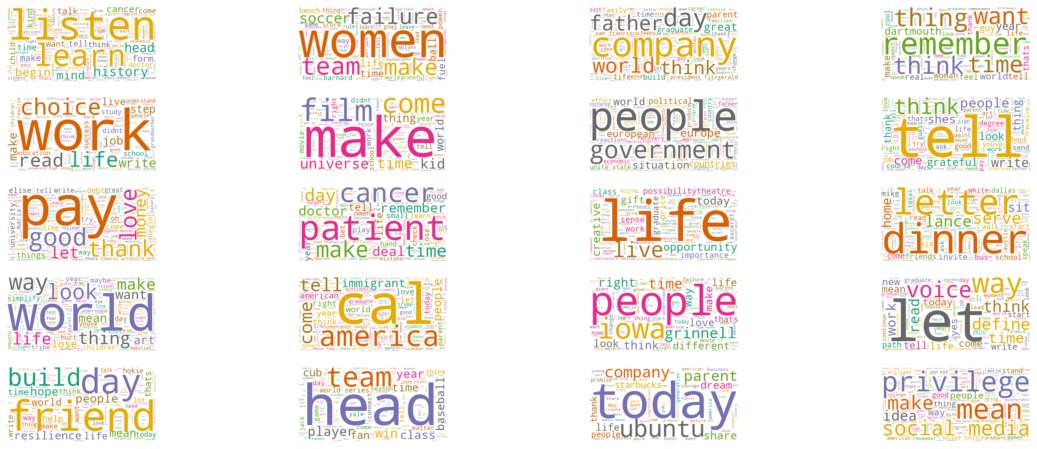

In [14]:
# Reset the output dimensions
plt.rcParams['figure.figsize'] = [20, 8]

# full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
#               'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

# Create subplots for each speech
for index, speech in enumerate(data.iloc[:,:20].columns):
    wc.generate(speech_clean_3.transcript[speech])
    
    plt.subplot(5, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
#     plt.title(full_names[index])
    
plt.show()

### 3. Part-Of-Speech (POS) Tagging
Categorizing words in a text (corpus) in correspondence with a particular part of speech, depending on the definition of the word and its context. Like adverb, verb (VB), noun (NN), determiner (DT), punctuation mark/sentence closer, etc.

Applications of POS tagging:
* Semantics
* Named entity recognition
* Co-reference resolution
* Speech recognition

#### A. Using nltk (`nltk.pos_tag`, `nltk.ne_chunk`)

In [ ]:
# Tokenize the article into sentences: sentences
sentences = sent_tokenize(article)

# Tokenize each sentence into words: token_sentences
token_sentences = [word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences,binary=True)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)

#### B. Using SpaCy library (`nlp = spacy.load('en')`, `nlp.entity(doc)`, `doc.ents`, `doc.ents.text`, `doc.ents.label_`)

#### Charting the diversity of name entity types

In [ ]:
# Create the defaultdict: ner_categories
ner_categories = defaultdict(int)

# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1
            
# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())

# Create a list of the values: values
values = [____.____ for v in labels]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Display the chart
plt.show()

#### C. Using polyglot library (multilingual)

### 4. n-grams